# The big plot

As promised, we are going to put together the plot that we started the course with:

<img src='../images/F3_plot.png' width=80%>

So, let us get started with our imports:

In [1]:
from welly import Well
import matplotlib.pyplot as plt
import numpy as np
import bruges
import pooch
import segyio
import gio

spot = pooch.create(path='../data', base_url="https://geocomp.s3.amazonaws.com/data/",
                    registry={"F3_8-bit_int.sgy": "md5:cbde973eb6606da843f40aedf07793e4",
                              "F02-1_logs.las": "md5:187cd72ca572f07f50af00c6090e9c40",
                              "F3_Demo_0_FS4.dat": None, })

Now we can load all of our data into memory:

In [2]:
fname = spot.fetch('F02-1_logs.las')

w = Well.from_las(fname) # we can read this directly, but this way we get a local version as well.

In [3]:
fname = spot.fetch('F3_8-bit_int.sgy')

with segyio.open(fname) as s:
    vol = segyio.cube(s)

In [4]:
fname = spot.fetch('F3_Demo_0_FS4.dat')
data = gio.read_odt(fname)['twt']  # Only one DataArray in this Dataset.
hor = data.values
hor_ = hor / 4

In [5]:
###
# Set up our plot limits and variables
###

# set boundaries of survey
ilines = 110, 558
xlines = 550, 1149

# Set variables for the seismic section of our plot
inline = 442 # This is the inline that we actually want.
index = 166 # we have a well on inline 442, but we need to use
            # the equivalent index to get things out of the numpy array.
_, _, ts = vol.shape # we need the number of timeslices in the volume
extent = (550, 1148, ts*0.004, 0)  # left, right, bottom, top.
                                   # The vertical axis is converted to time.
ma = vol.max()

# set things up for the map
horizon_extent = 550, 1148, 110, 558

# set things up for the wells
xindex = 228  # This is the index corresponding to xline 1006.
intersect = hor[index, xindex]

### EXERCISE

And now we will create the plot. Fill in the missing parts of the following function to generate it as shown, or as close to it as you can. This composite plot shows well F02-1, which is on inline 442 of our seismic volume from the F3 survey in the North Sea. The horizon is Flooding Surface 4.

1. Well log
    * Add the second well log.
    * Add a line showing the intersection of the horizon and the well to each plot
2. Cross-section
    * Add the title, and axis labels to the section.
    * Plot the horizon on the section. Note that you will need to reconcile the scale of the horizon to the scale of the seismic.
    * Plot a line where the well intersects the section.
    * Add a color bar.
3. Map view
    * Plot the horizon using `imshow`. Make sure to use the correct extents.
    * Plot the location of the well on the top-down view. It is at inline 1006, xline 448.
    * Draw the section line on the plot.
    * Add a color bar.
    
If you want, you can add some text annotations using `ax.text`.

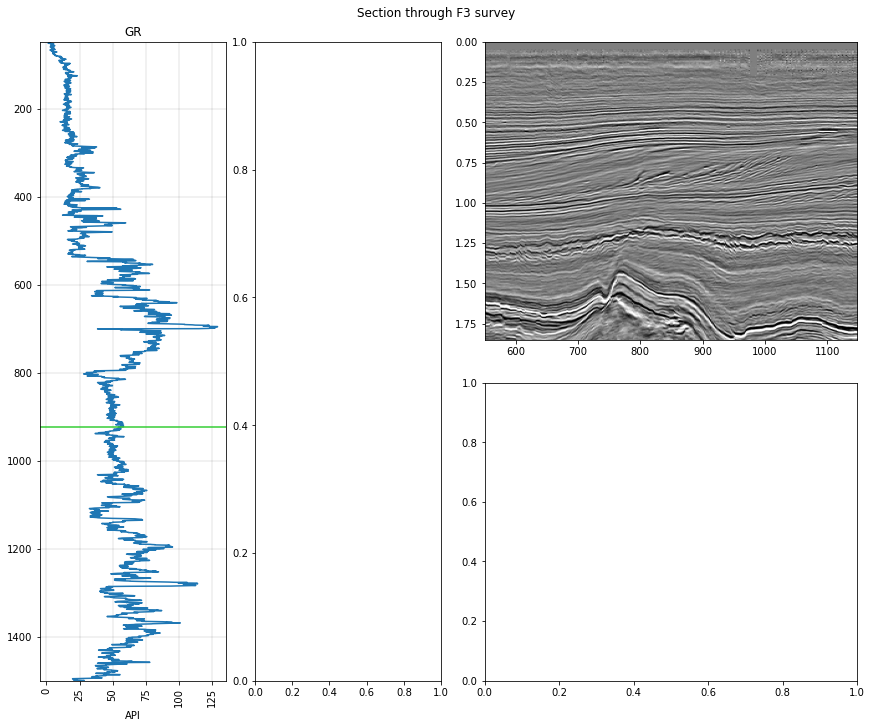

In [6]:
# Create our figure layout, using mosaic
fig = plt.figure(constrained_layout=True, figsize=(12,10))
mosaic = """ABCC
ABDD"""
ax_dict = fig.subplot_mosaic(mosaic)


###
# Begin our plotting proper
###

fig.suptitle('Section through F3 survey')

# Plot the main subplot.
ax = ax_dict['C']
im = ax.imshow(vol[index, :, :].T,
               extent=extent,
               cmap="gray_r",
               vmin=-ma, vmax=ma,
               aspect='auto',
              )

# Plot the well logs
w.data['GR'].plot(ax=ax_dict['A'])
ax_dict['A'].axhline(intersect, color='limegreen')

# Plot the top-down view of the surface


The bits highlighted below are the things that need to be added.

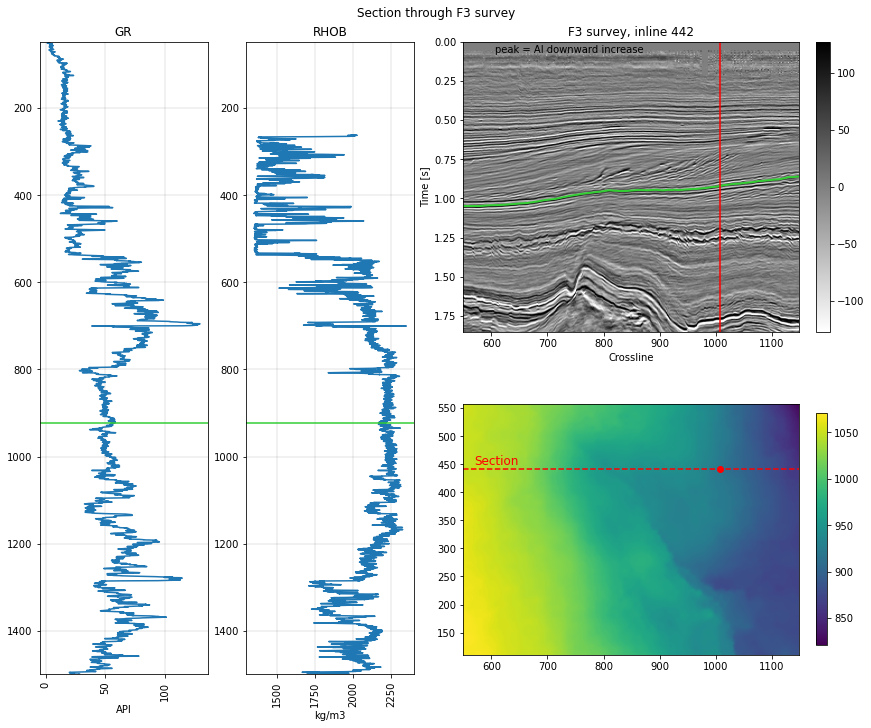

In [7]:
# Create our figure layout, using mosaic
fig = plt.figure(constrained_layout=True, figsize=(12,10))
mosaic = """
ABCC
ABDD"""
ax_dict = fig.subplot_mosaic(mosaic)


###
# Begin our plotting proper
###

fig.suptitle('Section through F3 survey')

# Plot the main subplot.
ax = ax_dict['C']
im = ax.imshow(vol[index, :, :].T,
               extent=extent,
               cmap="gray_r",
               vmin=-ma, vmax=ma,
               aspect='auto',
              )
# Add these:
cb = fig.colorbar(im, ax=ax)
ax.plot(np.arange(*xlines, 2), hor[index, :]/1000, c='limegreen', lw=2)
ax.set_title(f"F3 survey, inline {inline}")
ax.set_xlabel("Crossline")
ax.set_ylabel("Time [s]")
ax.text(607, 0.07, "peak = AI downward increase")
ax.axvline(1007, color='red') # draw a line for the well

# Plot the well logs
w.data['GR'].plot(ax=ax_dict['A'])
ax_dict['A'].axhline(intersect, color='limegreen')
# Add these:
w.data['RHOB'].plot(ax=ax_dict['B'])
ax_dict['B'].axhline(intersect, color='limegreen')

# Plot the top-down view of the surface
# Add all of this:
ax = ax_dict['D']
im = ax.imshow(hor,
               cmap="viridis",
               #vmin=-ma, vmax=ma,
               origin='lower',
               aspect='equal',
               extent=horizon_extent,
              )
ax.axhline(442, c='red', ls='--')
# ax.axhline(inline*2 + 110, c='red', ls='--')
ax.text(570, 450, "Section", color='red', fontsize=12)
ax.scatter(1007, 442, c='red') # add the well location.
cb = fig.colorbar(im, ax=ax, shrink=0.8)
    
# plt.savefig('../F3_plot.png', dpi=300)